# Proyecto: Community Detection Problem

Para comenzar vamos a comprobar que seamos capaces de importar los módulos de Python que necesitaremos.
La finalidad de este cuaderno será hacer una <i>puesta a punto</i>: instalar los módulos, y poder cargar los datos NIPS.
Finalmente, a partir de los datos de NIPS y utilizando los módulos NetworkX y Community, mostraremos distintos gráficos sobre los autores y su colaboración.

### Construcción del grafo NIPS

Hemos vectorizado y optimizado el código anterior para que la ejecución sea más eficiente y rápida, haciendo uso de las bibliotecas <i>Pandas</i> y <i>NetworkX</i>.

In [1]:
# SQL
import sqlite3

# Pandas
import pandas as pd

# Graph
import networkx as nx

# Plot
import matplotlib.pyplot as plt

# Combinations
import itertools

def get_dataframe():
    # Get data
    connect = sqlite3.connect('./data/database.sqlite')
    query = """
    SELECT pa.paper_id, pa.author_id, a.name
    FROM paper_authors AS pa JOIN papers AS p ON pa.paper_id = p.id
    JOIN authors as a ON pa.author_id = a.id
    WHERE p.Year BETWEEN '2014' AND '2015'
    """
    df = pd.read_sql(query, connect)
    df.head(10)

    return df

def crear_grafo(df):
    # Initialize graph
    G = nx.Graph()

    # Transform
    for p, a in df.groupby('paper_id')['name']: # a -> nombres de autores que participaron en el mismo paper 
        for u, v in itertools.combinations(a, 2): # u, v -> todas las parejas posibles de autores dentro del paper sin repeción
            if G.has_edge(u, v):
                G[u][v]['weight'] +=1 # si la arista existe (ya habían colaborado antes), incrementa su peso en 1
            else:
                G.add_edge(u, v, weight=1) # si la arista no existe (no habían colaborado antes), la crea y le da un peso de 1
    
    return G

def visualizar_grafo(G):

    #Draw graph
    plt.figure(figsize=(13, 9))
    pos = nx.spring_layout(G)
    nx.draw_networkx_nodes(G, pos, node_size = 20, node_color='0.75')
    nx.draw_networkx_edges(G, pos, alpha=0.5, width=1)
    plt.show()

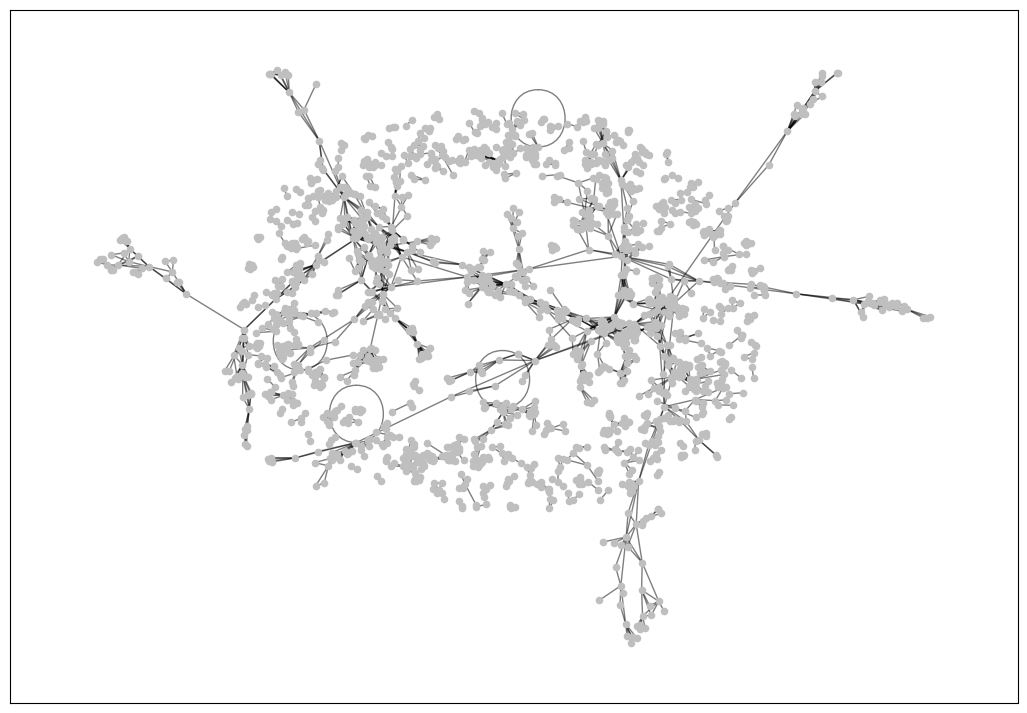

In [2]:
df = get_dataframe()
grafo = crear_grafo(df)
visualizar_grafo(grafo)